# Author-Rohan Rathi
## Technical TASK 1-Prediction Using Supervised ML(Level-Beginner)

In this task, we aim to forecast a student's expected test score percentage by considering the number of hours they have devoted to studying. This task involves a straightforward linear regression analysis, focusing on only two variables.

In [33]:
# Importing all libraries required in this notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Step1:Reading data from a remote Link


In [35]:
url = "http://bit.ly/w-data"
sparks_data = pd.read_csv(url)
sparks_data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

# Step2:Data Visualization

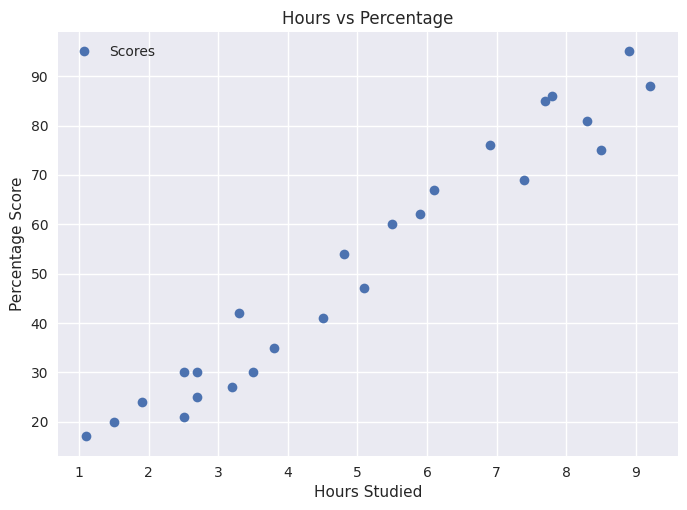

In [38]:
with plt.style.context('seaborn'):  
 sparks_data.plot(x='Hours', y='Scores', style='o')

# Add title and labels
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 

# Display the plot
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Step 3 : Preparing The Data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [21]:
# Extract the feature (X) and target (y) variables
X = sparks_data.iloc[:, :-1].values  # Extract all rows and all columns except the last one
y = sparks_data.iloc[:, 1].values   # Extract all rows and only the last column

## Step 4 :- Algorithm Training
Splitting the data into training data-set and test data-set. Then, start training the algorithm.

In [23]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [39]:
# Create a LinearRegression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Print a message to indicate training completion
print("Training is completed!!")

Training is completed!!


## Step 5 : Ploting the line of regression

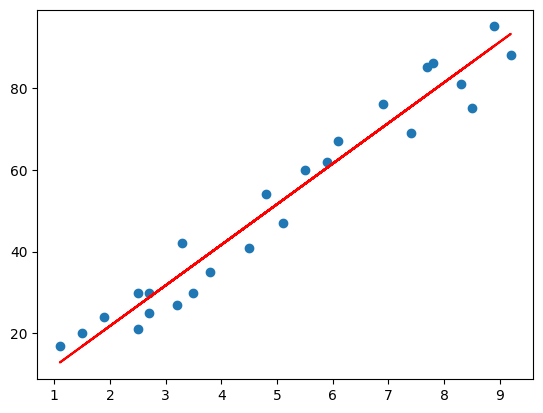

In [40]:
# Calculate the regression line
line = regressor.coef_ * X + regressor.intercept_

# Create a scatter plot for the test data points
plt.scatter(X, y)

# Plot the regression line
plt.plot(X, line,color='Red')

# Display the plot
plt.show()


## Step 6 - Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [28]:
# Display the testing data (X_test)
print("Testing data (X_test):\n", X_test)

# Predict the scores using the trained regressor
y_pred = regressor.predict(X_test)

# Print a message indicating the prediction step
print("Predicting the scores...")


Testing data (X_test):
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Predicting the scores...


## Step 7 : Comparing Actual vs Predicted

In [41]:
# Create a DataFrame to compare Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
df


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [42]:
# Estimate the training and testing data scores
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)

# Print the training and testing scores
print("Training score:", training_score)
print("Testing score:", testing_score)

Training score: 0.9515510725211552
Testing score: 0.9454906892105355


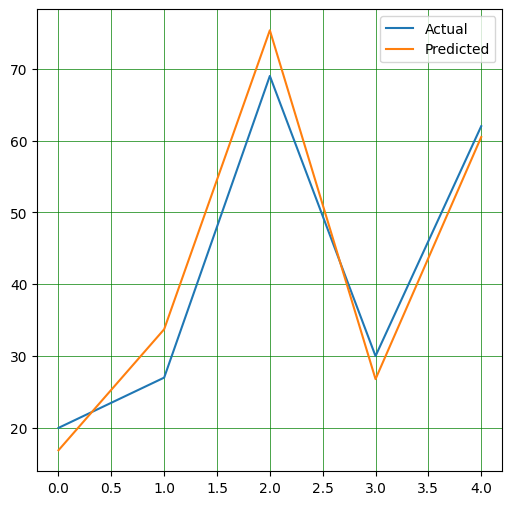

In [51]:
# Plot a line graph to visualize the difference between actual and predicted values
df.plot(kind='line', figsize=(6, 6))
plt.grid(which='major', linewidth='0.5', color='black')
plt.grid(which='major', linewidth='0.5', color='green')
plt.show()


In [30]:
# We will test with your own data
hours = 9.25
predicted_score = regressor.predict([[hours]])[0]
print(f"Number of Hours = {hours}")
print(f"Predicted Score = {predicted_score}")


Number of Hours = 9.25
Predicted Score = 93.69173248737535


## Step 8 : Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root mean squared Error: 4.647447612100367


## Thankyou!!